In [1]:
import numpy as np
from numpy.random import randn
import pandas as pd

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
dataset = randn(25)

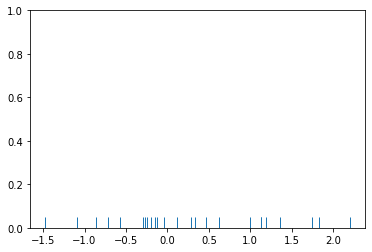

In [4]:
sns.rugplot(dataset)

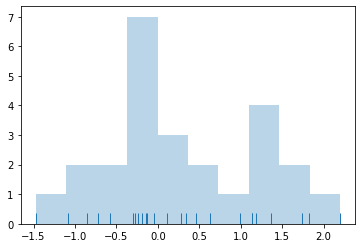

In [5]:
plt.hist(dataset, alpha=0.3)
sns.rugplot(dataset)

(0.0, 1.0)

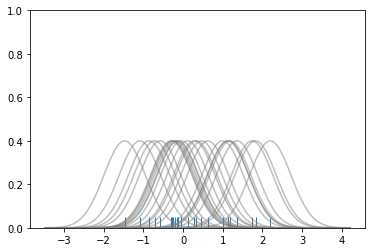

In [9]:
sns.rugplot(dataset)

x_min = dataset.min() - 2
x_max = dataset.max() + 2
x_axis = np.linspace(x_min, x_max, 100)

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**0.2

kernel_list = []
for dataset_point in dataset:
  kernel = stats.norm(dataset_point, bandwidth).pdf(x_axis)
  kernel_list.append(kernel)

  kernel = kernel / kernel.max()
  kernel = kernel * 0.4
  plt.plot(x_axis, kernel, color = 'gray', alpha=0.5)
plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

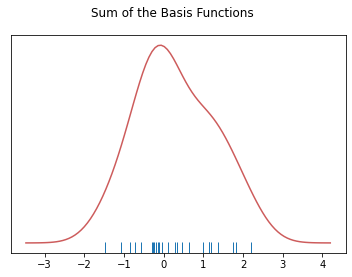

In [13]:
sum_of_kde = np.sum(kernel_list, axis=0)

fig = plt.plot(x_axis, sum_of_kde, color='indianred')
sns.rugplot(dataset)
plt.yticks([])
plt.suptitle('Sum of the Basis Functions')

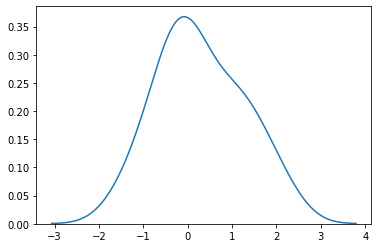

In [14]:
sns.kdeplot(dataset)

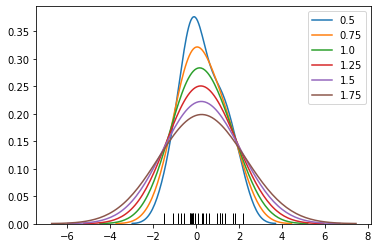

In [15]:
sns.rugplot(dataset, color='black')
for bw in np.arange(0.5, 2, 0.25):
  sns.kdeplot(dataset, bw=bw, label=bw)

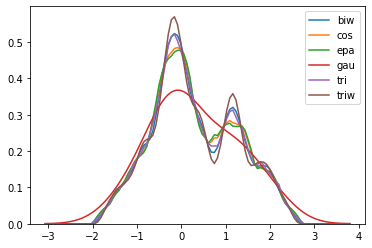

In [16]:
kernel_options = ['biw', 'cos', 'epa', 'gau', 'tri', 'triw']
for kern in kernel_options:
  sns.kdeplot(dataset, kernel=kern, label=kern)

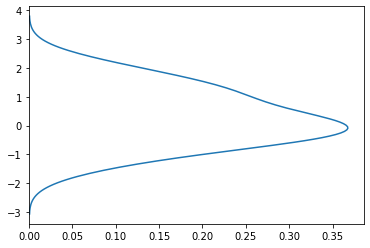

In [17]:
sns.kdeplot(dataset, vertical=True)

(array([ 1.,  3.,  5., 12., 15., 17., 18., 22., 24., 25.]),
 array([-1.47320967, -1.10600073, -0.73879179, -0.37158285, -0.00437391,
         0.36283503,  0.73004397,  1.09725291,  1.46446185,  1.83167079,
         2.19887973]),
 <a list of 10 Patch objects>)

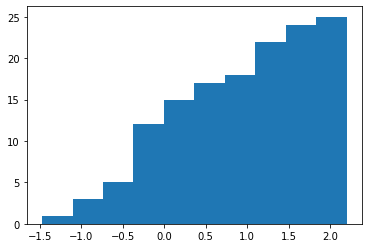

In [19]:
plt.hist(dataset, cumulative=True)

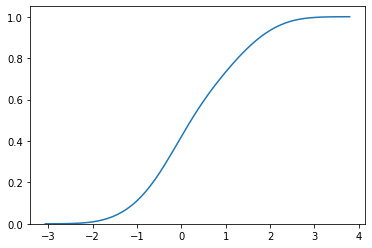

In [20]:
sns.kdeplot(dataset, cumulative=True)

In [21]:
mean=[0,0]
cov=[[1,0],[0,100]]
dataset2 = np.random.multivariate_normal(mean, cov, 1000)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:690: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


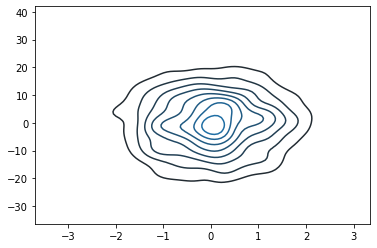

In [22]:
dframe = pd.DataFrame(dataset2, columns=['X','Y'])
sns.kdeplot(dframe)

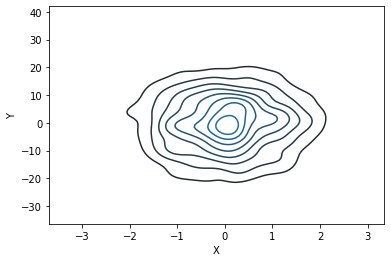

In [23]:
sns.kdeplot(dframe.X, dframe.Y)

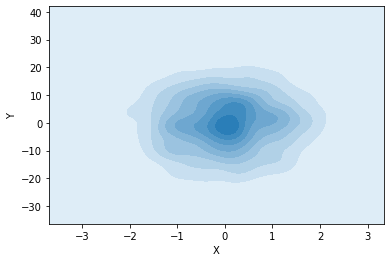

In [24]:
sns.kdeplot(dframe.X, dframe.Y, shade=True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:690: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


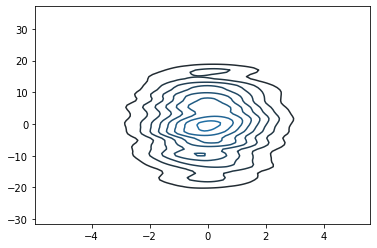

In [25]:
sns.kdeplot(dframe, bw=1)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:690: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


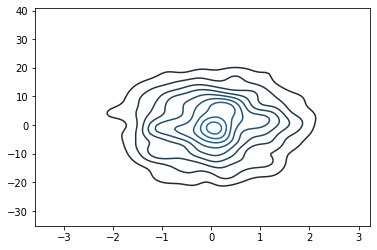

In [26]:
sns.kdeplot(dframe, bw='silverman')

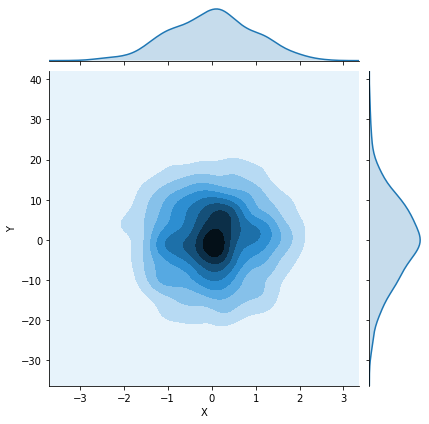

In [27]:
sns.jointplot('X', 'Y', dframe, kind='kde')